<a href="https://colab.research.google.com/github/TejaswaniVelugoti/Lumpy-Skin-Disease-Detection/blob/main/Lumpy_Skin_Detection_Using_DenseNet169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Lumpy Skin Images Dataset'

datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='validation',
                                                    ),
}


Found 928 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
base_model = DenseNet169(weights=None, include_top=False, input_shape=(256, 256, 3))


base_model.load_weights('/content/drive/MyDrive/DenseNet-BC-169-32-no-top.h5')


base_model.trainable = False


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(216,activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
opt = optimizers.Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 global_average_pooling2d_1  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1664)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1704960   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 216)               110808    
                                                      

In [ ]:
batch_size = 32
epochs = 15

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size



In [ ]:
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]

densemodel = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)


<ipython-input-15-7c5f3d6f5d25>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  densemodel = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,


Epoch 1/15
29/29 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7295 
Epoch 1: val_accuracy improved from -inf to 0.85417, saving model to ./model_01-0.85.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 468s 15s/step - loss: 0.5492 - accuracy: 0.7295 - val_loss: 0.3760 - val_accuracy: 0.8542
Epoch 2/15
29/29 [==============================] - ETA: 0s - loss: 0.3596 - accuracy: 0.8556
Epoch 2: val_accuracy did not improve from 0.85417
29/29 [==============================] - 23s 782ms/step - loss: 0.3596 - accuracy: 0.8556 - val_loss: 0.3107 - val_accuracy: 0.8542
Epoch 3/15
29/29 [==============================] - ETA: 0s - loss: 0.2880 - accuracy: 0.8890
Epoch 3: val_accuracy improved from 0.85417 to 0.88542, saving model to ./model_03-0.89.h5
29/29 [==============================] - 22s 763ms/step - loss: 0.2880 - accuracy: 0.8890 - val_loss: 0.2765 - val_accuracy: 0.8854
Epoch 4/15
29/29 [==============================] - ETA: 0s - loss: 0.2846 - accuracy: 0.8987
Epoch 4: val_accuracy did not improve from 0.88542
29/29 [==============================] - 24s 806ms/step - loss: 0.2846 - accuracy: 0.8987 - val_loss: 0.2788 - val_accuracy: 0.875

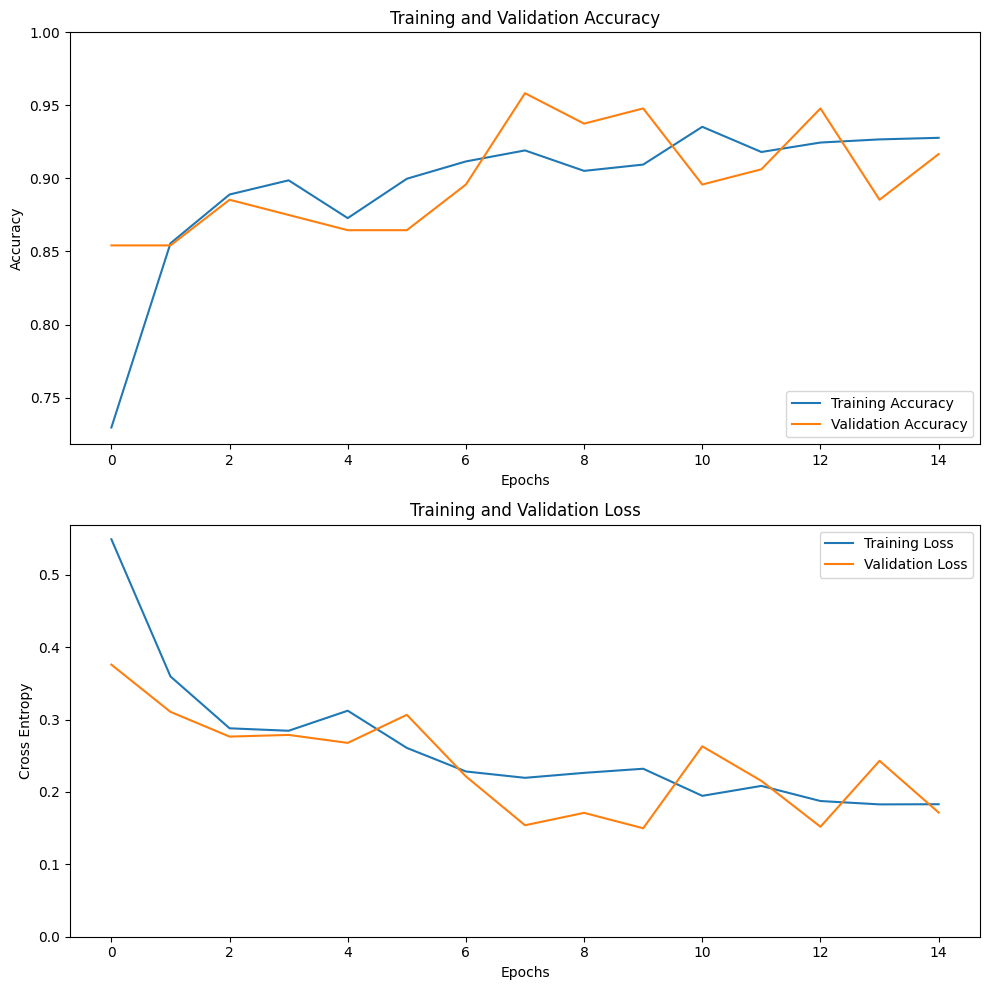

In [ ]:

acc = densemodel.history['accuracy']
val_acc = densemodel.history['val_accuracy']
loss = densemodel.history['loss']
val_loss = densemodel.history['val_loss']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [ ]:
loaded_best_model = keras.models.load_model("/content/model_08-0.96.h5")


def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(256, 256))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'Lumpy Skin', 1: 'Normal Skin'}

    print("\n\nMaximum Probability is: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified as:", predicted_class, "\n\n")

    classes=[]
    prob=[]

    for i,j in enumerate (p[0],0):
        print(labels[i],':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob,color='violet')
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability of the Lumpy Skin Disease')
        plt.show()
    plot_bar_x()

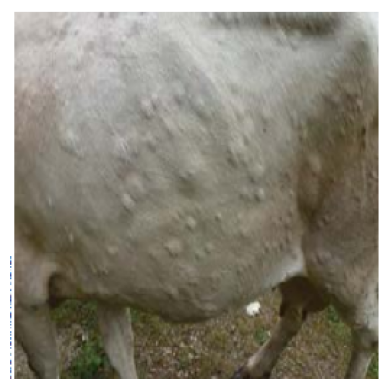

1/1 [==============================] - 3s 3s/step


Maximum Probability is:  0.9925909
Classified as: Lumpy Skin 


Lumpy Skin : 99.26 %
Normal Skin : 0.74 %


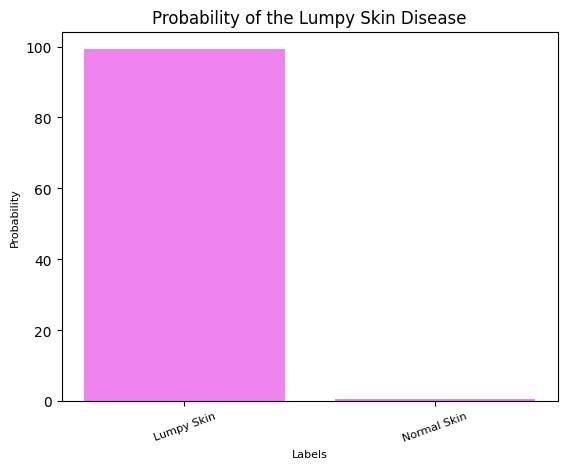

In [ ]:
predict('/content/drive/MyDrive/Lumpy Skin Images Dataset/Lumpy Skin/Lumpy_Skin 334.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
